<a href="https://colab.research.google.com/github/krishnayogik/python/blob/master/keras_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# write to txt file direclty
from urllib.request import urlopen

csvlink ='https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'

import pandas as pd
df = pd.read_csv(csvlink,index_col=0,parse_dates=[0])


In [0]:
dataset_train = df

training_set = dataset_train.iloc[:, 1:2].values
dataset_train.head()

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

import numpy as np

X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1975/1975 [==============================] - 13s 7ms/step - loss: 0.0135
Epoch 2/50
1975/1975 [==============================] - 9s 5ms/step - loss: 0.0030
Epoch 3/50
1975/1975 [==============================] - 9s 5ms/step - loss: 0.0030
Epoch 4/50
1975/1975 [==============================] - 9s 5ms/step - loss: 0.0027
Epoch 5/50
1975/1975 [==============================] - 9s 5ms/step - loss: 0.0027
Epoch 6/50
1975/1975 [==============================] - 9s 5ms/step - loss: 0.0022
Epoch 7/50
1975/1975 [==============================] - 9s 5ms/step - loss: 0.0020
Epoch 8/50
1975/1975 [==============================] - 9s 5ms/step - loss: 0.0022
Epoch 9/50
1975/1975 [==============================] - 9s 5ms/step - loss: 0.0020
Epoch 10/50
1975/

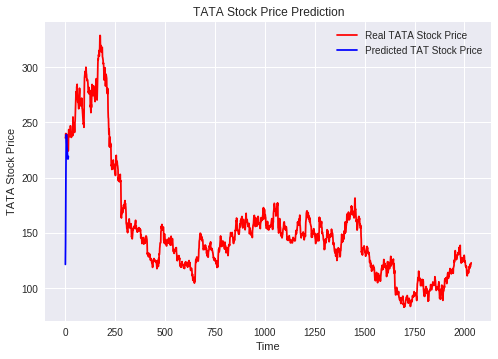

In [4]:
#test 

testlink ="https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv"
dataset_test = pd.read_csv(csvlink,index_col=0,parse_dates=[0])
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


import matplotlib.pyplot as plt

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()